<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=72e986447fedb50645c5898d461ba9769ab99d7cc9f191e3bc4f2d74993331e2
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
centers=3

In [6]:
# Step 1: Generate a synthetic dataset
X, y = make_blobs(n_samples=3000, centers=centers, random_state=42, cluster_std=3)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Convert the dataset into a pandas DataFrame
# Adding feature columns
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Adding the target variable
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())


   Feature_1  Feature_2  Target
0  -5.417711  -3.664320       2
1  -2.377763   8.573280       0
2  -6.609834   8.339990       0
3  -1.425011  13.628396       0
4  -1.088189   5.928077       1


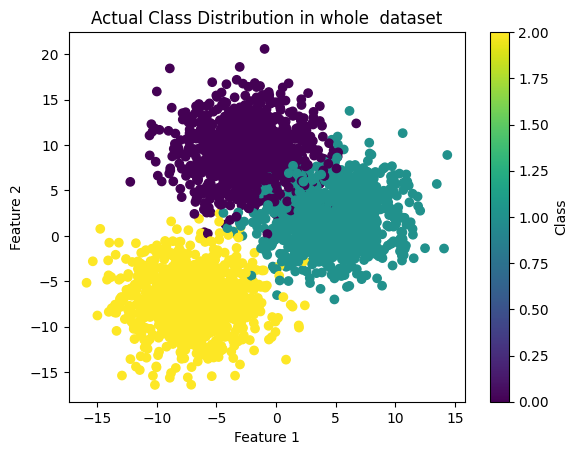

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Class Distribution in whole  dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

In [10]:
# Step 2: Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [139]:
# Step 3: Implement a simple model for softmax regression

class SoftmaxRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, n_classes, lr=0.01, epochs=1000):
        m, n_features = X.shape
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for _ in range(epochs):
            scores = np.dot(X, self.weights) + self.bias
            probabilities = softmax(scores)

            # Compute the gradient
            y_one_hot = np.eye(n_classes)[y]
            dw = np.dot(X.T, (probabilities - y_one_hot)) / m
            db = np.sum(probabilities - y_one_hot, axis=0) / m

            # Update the weights and bias
            self.weights -= lr * dw
            self.bias -= lr * db

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probabilities = softmax(scores)
        return np.argmax(probabilities, axis=1)


Accuracy: 0.9544444444444444


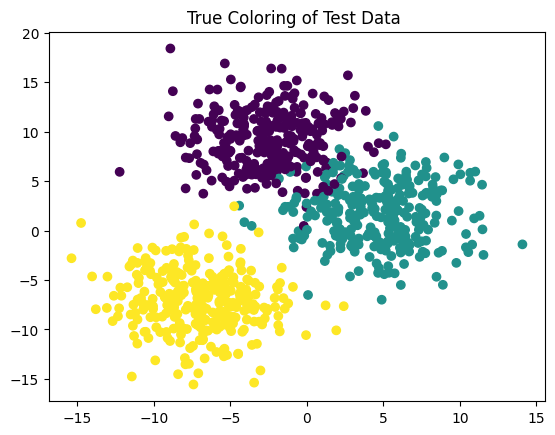

In [140]:
# Step 4: Train the model
model = SoftmaxRegression()
model.fit(X_train, y_train, n_classes=centers,epochs=1000)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optional: Plotting the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("True Coloring of Test Data ")
plt.show()


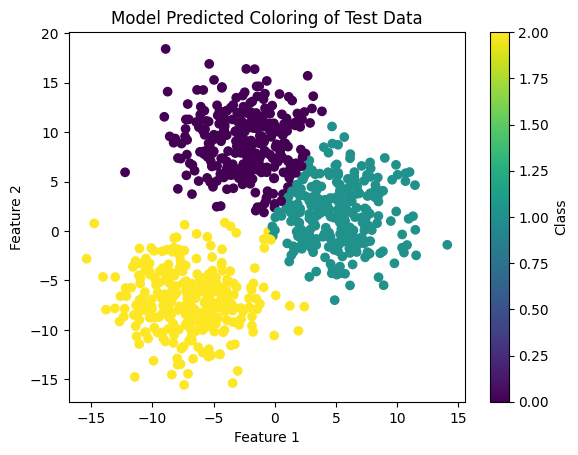

In [141]:
#Assuming X_test and y_test are already defined from the previous code
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Model Predicted Coloring of Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()


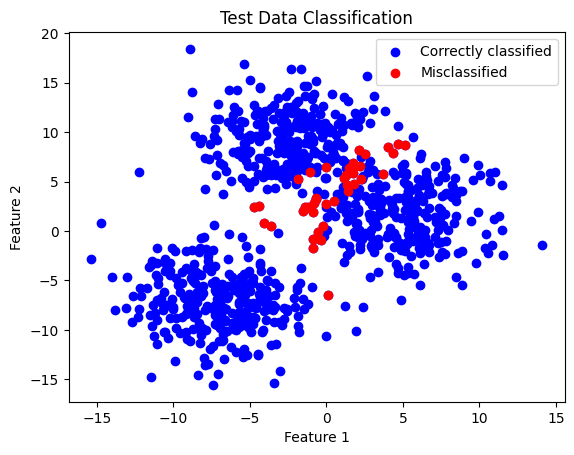

In [142]:
# Assuming y (true labels) and y_pred (predicted labels) are already defined in the notebook
# Identify the indices where y_pred differs from y
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]


# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Correctly classified')
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data Classification')
plt.legend()
plt.show()



In [143]:
# Assuming the model has been trained as per the previous steps

# Print the weights
print("Weights of the trained model:")
print(model.weights)

# Print the biases
print("\nBiases of the trained model:")
print(model.bias)

Weights of the trained model:
[[-0.21501033  0.6340031  -0.41899278]
 [ 0.42311514  0.02386677 -0.44698191]]

Biases of the trained model:
[-0.24643882  0.39117048 -0.14473167]


In [144]:
# Assuming model is your trained SoftmaxRegression model
# and X is your feature matrix

# Selecting a data point from X (for example, the first data point)
data_point = X[0]

# Computing Wx + b
# Since data_point is a 1D array and model.weights is a 2D array,
# we use np.dot for matrix multiplication
linear_combination = np.dot(data_point, model.weights) + model.bias

print("The result of Wx + b for the selected data point:")
print(linear_combination)


The result of Wx + b for the selected data point:
[-0.63200419 -3.13113087  3.76313506]


In [22]:
model.weights

array([[-0.00646169,  0.03924183, -0.03278014],
       [ 0.04781326,  0.00286557, -0.05067883]])

# Iris flower dataset
[Wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [113]:
from sklearn.datasets import load_iris

iris = load_iris()
#iris

In [145]:
import seaborn as sns
from sklearn import datasets

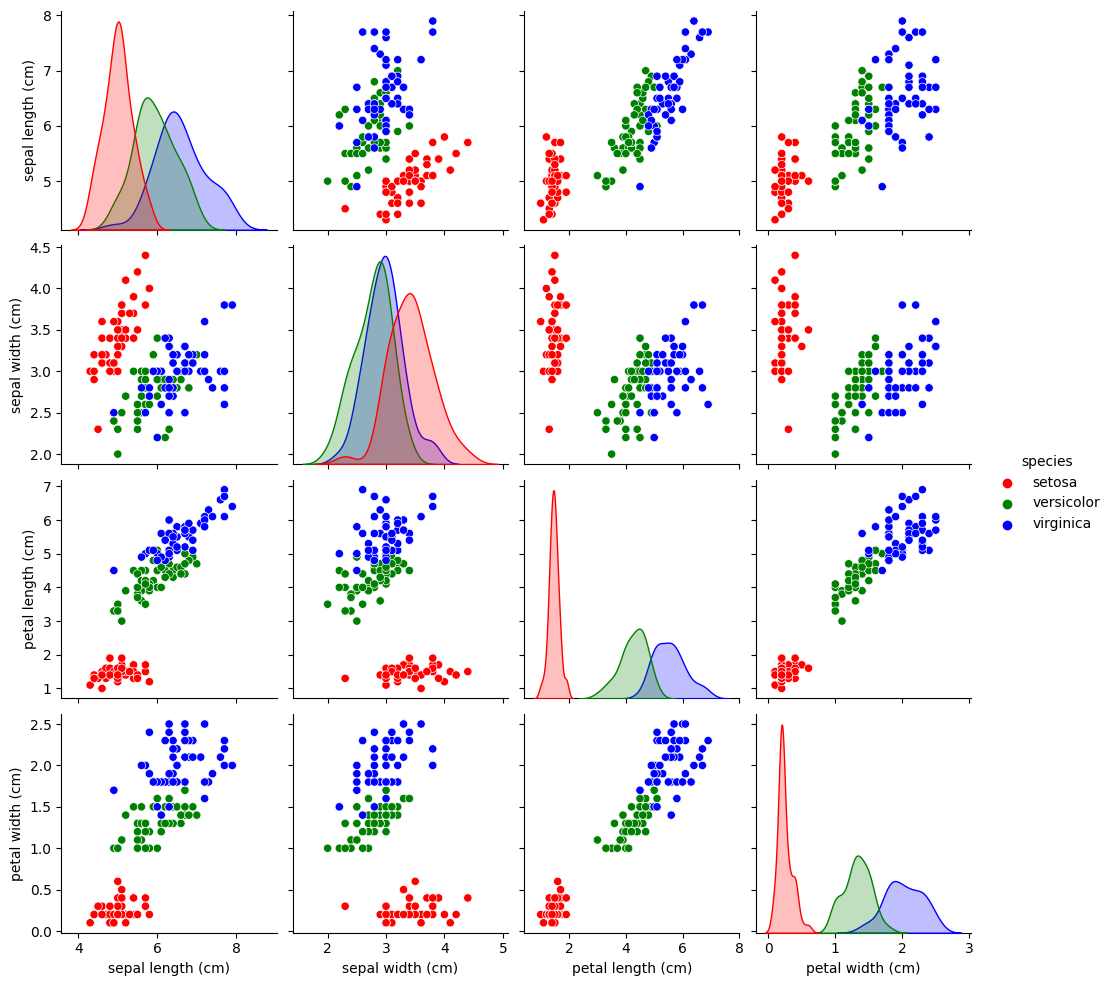

In [78]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column to the dataframe
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pairplot using seaborn
sns.pairplot(iris_df, hue="species", palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})


**Let's focus on [sepal length, sepal width]**

In [146]:
# Load the iris dataset
iris = datasets.load_iris()

# Extracting sepal length and sepal width
X = iris.data[:, :2]  # This selects all rows and the first two columns (sepal length and width)

# The target (species)
y = iris.target

# If you want to convert the numerical labels of the species into their corresponding names
species = pd.Categorical.from_codes(iris.target, iris.target_names)
y_species = species


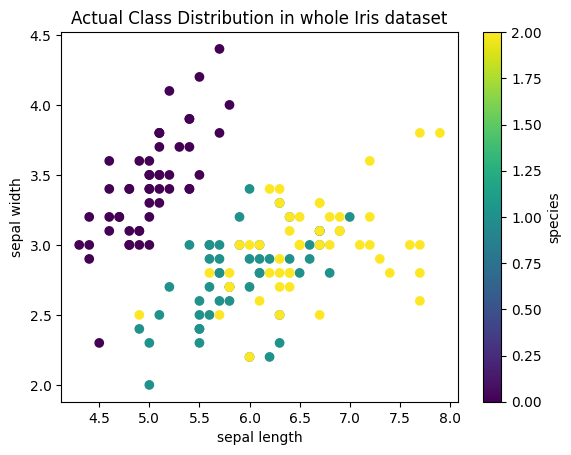

In [147]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Class Distribution in whole Iris dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.colorbar(label='species')
plt.show()

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [149]:
centers=3

Accuracy: 0.6222222222222222


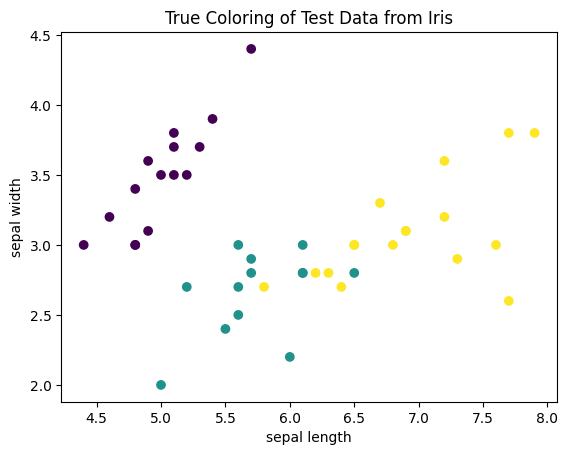

In [151]:
model = SoftmaxRegression()
model.fit(X_train, y_train, n_classes=centers,epochs=100)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optional: Plotting the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("True Coloring of Test Data from Iris")
plt.show()


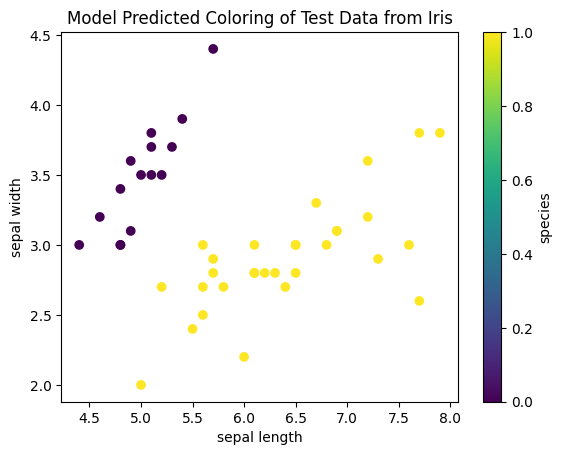

In [152]:
# Assuming X_test and y_test are already defined from the previous code
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Model Predicted Coloring of Test Data from Iris")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.colorbar(label='species')
plt.show()

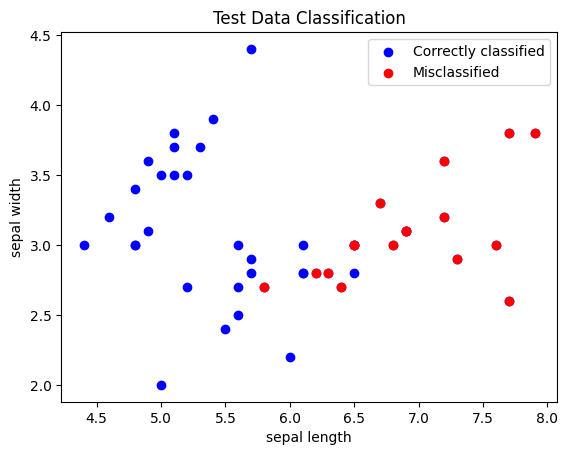

In [153]:
# Assuming y (true labels) and y_pred (predicted labels) are already defined in the notebook
# Identify the indices where y_pred differs from y
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]


# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Correctly classified')
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', label='Misclassified')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title('Test Data Classification')
plt.legend()
plt.show()